<h1 align="center">Fase 2 - Machine Learning and Time Series</h1>

## Módulo 01 - Machine Learning com Python

### Aula 3 - Feature Engineering
- **Descrição:** 

#### 1. Imports :
Para realizar a análise dos dados, as seguintes bibliotecas foram utilizadas:
* **sys**: para manipulação de variáveis do sistema.
* **os**: para manipulação de arquivos e diretórios.
* **Pandas**: para manipulação e análise dos dados.
* **Numpy**: para manipulação de arrays e operações matemáticas.
* **Matplotlib**: para visualização dos dados.
*  **Seaborn**: para visualização dos dados.
*  **Scikit-learn**: para aplicação de algoritmos de Machine Learning.

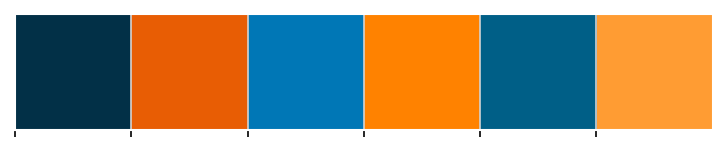

In [1]:
# Data manipulation and visualization.
import sys
import os
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Add the project root directory to sys.path
sys.path.append(os.path.abspath('../../'))

# Now try importing the module
from scripts.data_visualization.style_visualization import *
from scripts.data_visualization.plot_visualization import *
from scripts.data_analysis.outlier_detection import *
from scripts.utils.custom_exceptions import *

# Set up the visualization environment with a custom color palette
custom_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#005f87', '#ff9c33']
configure_visualization(palette=custom_palette)

#### 2. Aquisição dos dados
- **Descrição:**  Os dados foram obtidos a partir do github do curso, e são referentes a um dataset sobre imóveis. 

##### 2.1 -  Importando a Base de dados 

In [2]:
# Corrigir o caminho para subir um nível na estrutura de diretórios antes de acessar 'data/raw'
file_path = os.path.join(os.path.abspath('../../'), 'data/raw/fase_02/data/raw/data_imoveis.csv')

In [3]:
data = pd.read_csv('../../data/raw/data_imoveis.csv')

In [4]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


* **Verificando a necessidade de limpeza e tratamento dos dados.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   price          float64
 2   bedrooms       float64
 3   bathrooms      float64
 4   sqft_living    int64  
 5   sqft_lot       int64  
 6   floors         float64
 7   waterfront     int64  
 8   view           int64  
 9   condition      int64  
 10  sqft_above     int64  
 11  sqft_basement  int64  
 12  yr_built       int64  
 13  yr_renovated   int64  
 14  street         object 
 15  city           object 
 16  statezip       object 
 17  country        object 
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
data.notnull().sum()

date             4600
price            4600
bedrooms         4600
bathrooms        4600
sqft_living      4600
sqft_lot         4600
floors           4600
waterfront       4600
view             4600
condition        4600
sqft_above       4600
sqft_basement    4600
yr_built         4600
yr_renovated     4600
street           4600
city             4600
statezip         4600
country          4600
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

##### 2.2 - Correlação entre as variáveis

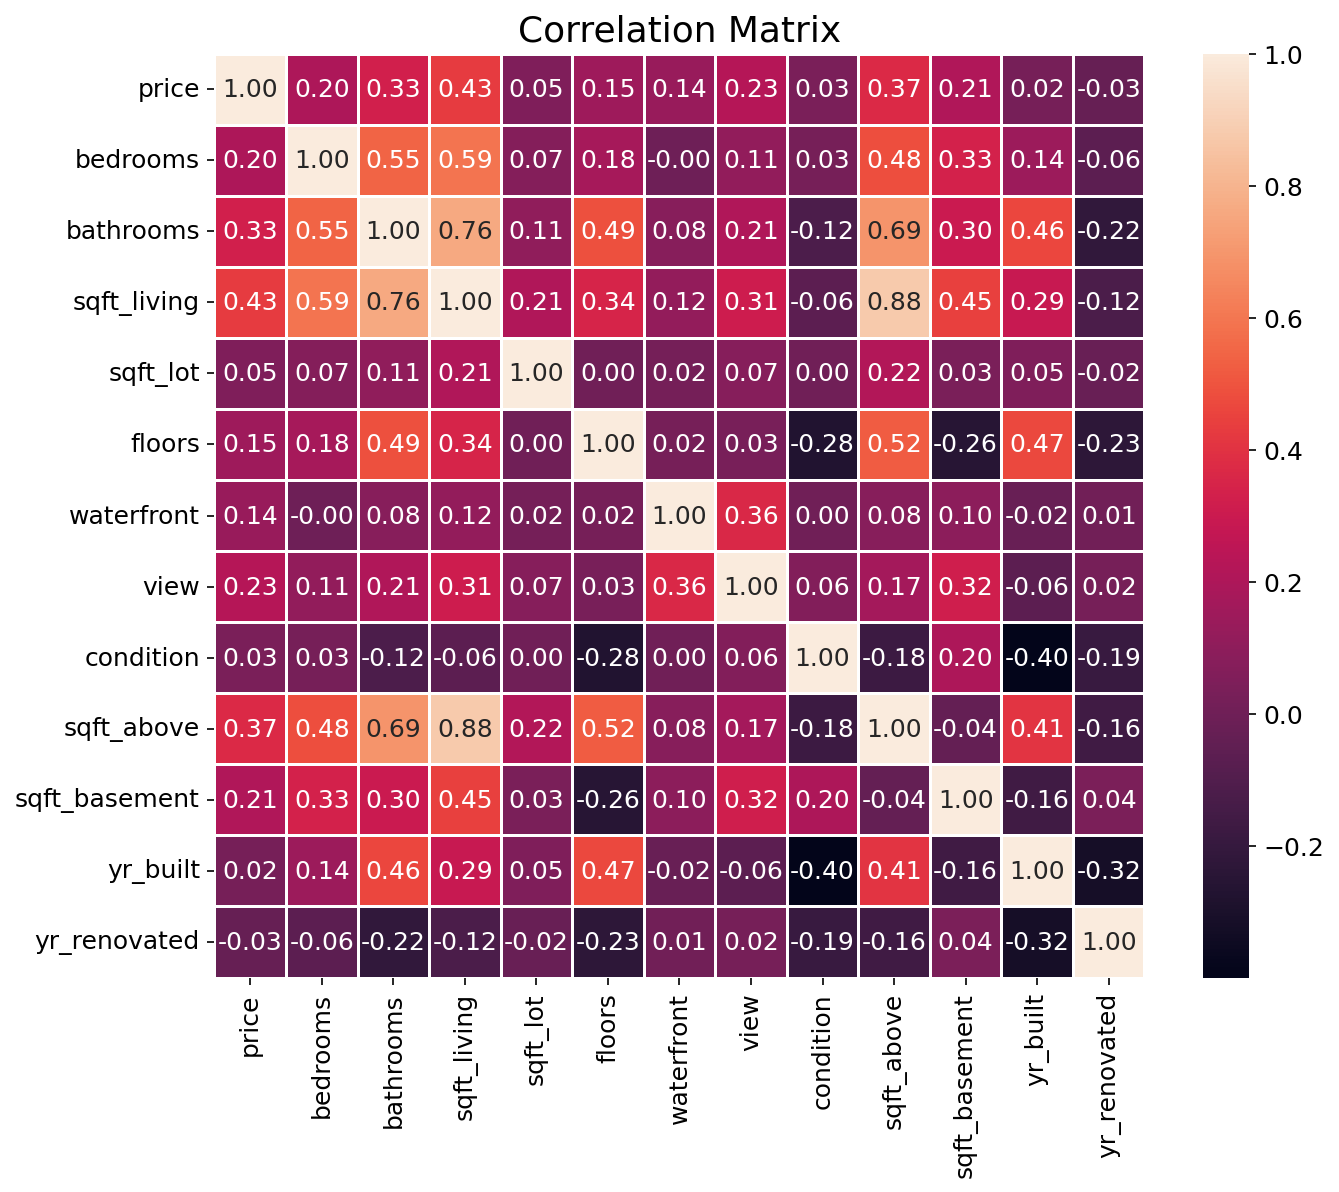

In [9]:
#criando a matriz de correlação excetuando as colunas do tipo object e data
correlation_matrix = data.drop(columns=['date','street', 'city', 'statezip', 'country']).corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data = correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, ax=ax)
plt.title('Correlation Matrix')
plt.show()

In [10]:
x = data[['sqft_living', 'bathrooms']].values
y = data['price'].values

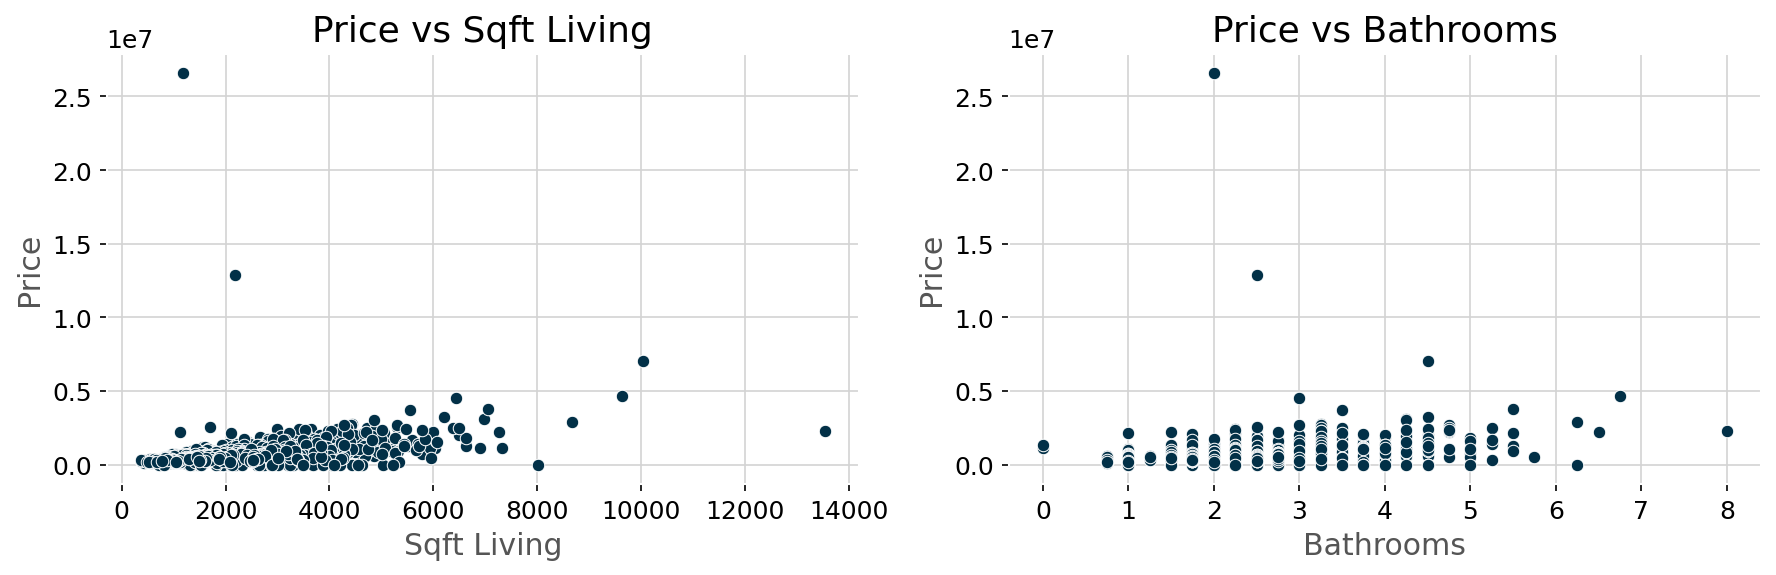

In [11]:
#criando dois subplots com seaborn
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(x='sqft_living', y='price', data=data, ax=axes[0])
axes[0].set_title('Price vs Sqft Living')
axes[0].set_xlabel('Sqft Living')
axes[0].set_ylabel('Price')

sns.scatterplot(x='bathrooms', y='price', data=data, ax=axes[1])
axes[1].set_title('Price vs Bathrooms')
axes[1].set_xlabel('Bathrooms')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()



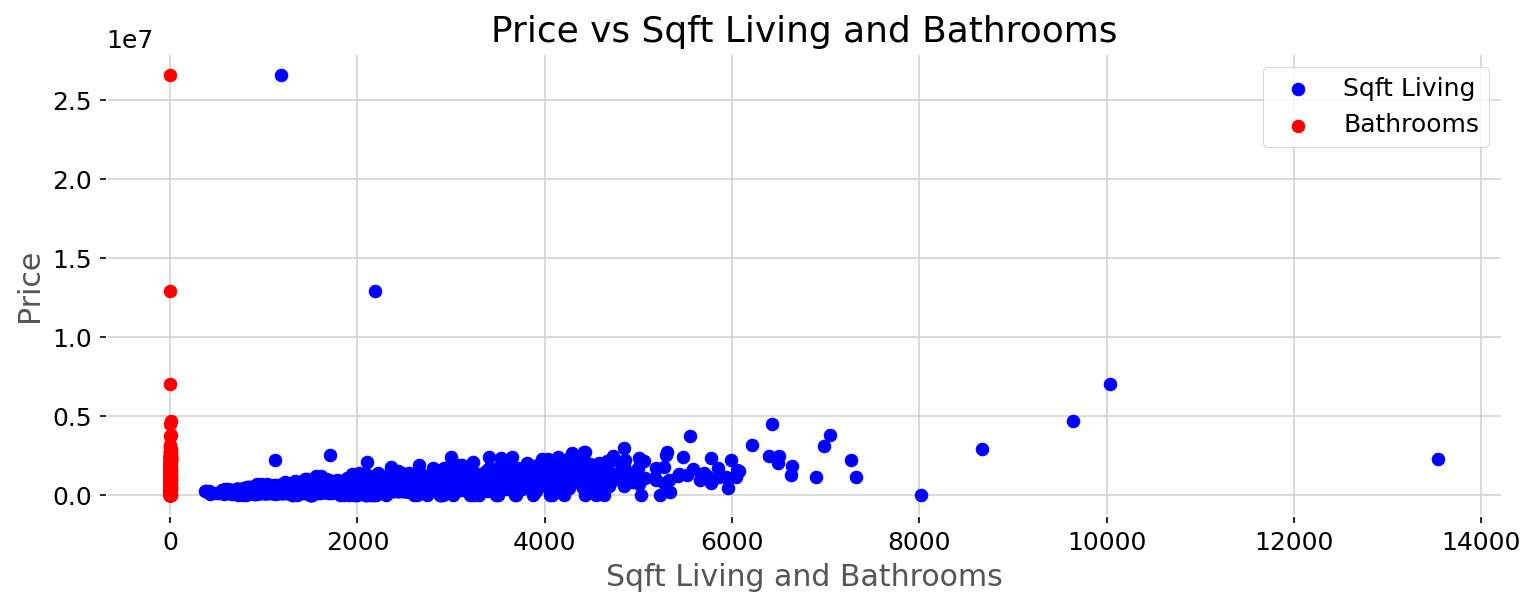

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(x[:, 0], y, color='blue', label='Sqft Living')
ax.scatter(x[:, 1], y, color='red', label='Bathrooms')
ax.set_title('Price vs Sqft Living and Bathrooms')
ax.set_xlabel('Sqft Living and Bathrooms')
ax.set_ylabel('Price')
ax.legend()

plt.show()

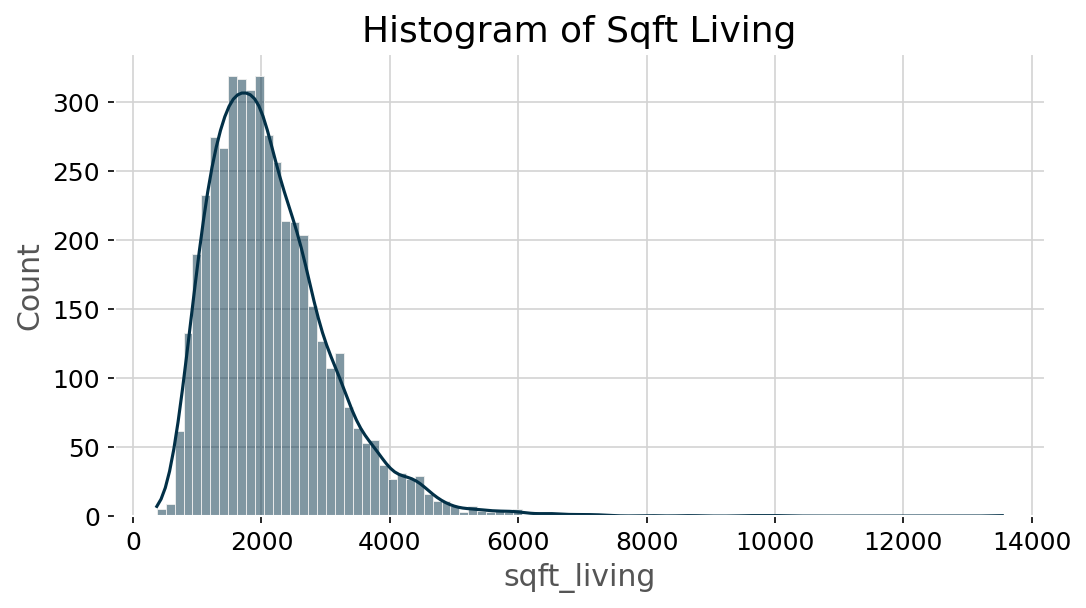

In [13]:
sns.histplot(data=data, x='sqft_living', kde=True)
plt.title('Histogram of Sqft Living')
plt.show()

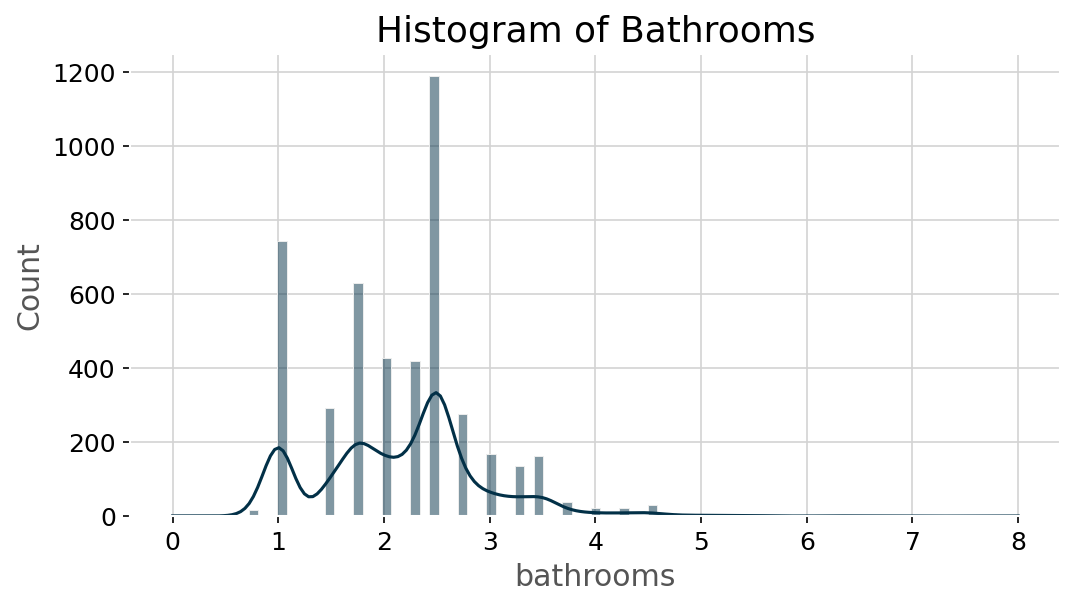

In [14]:
sns.histplot(data=data, x='bathrooms', kde=True)
plt.title('Histogram of Bathrooms')
plt.show()

##### **Observação:**  Comparar dados de escalas e distribuições diferentes ***pode*** ser um problema para algoritmos de aprendizado de máquina. Portanto, é importante normalizar ou padronizar os dados antes de treinar um modelo de aprendizado de máquina.

##### 2.3 - Padronização e Normalização dos dados


In [15]:
#colocando a media dos dados em 0 e o desvio padrão em 1(unitário) - Z-score
scaler = StandardScaler()
x_std = scaler.fit_transform(x)


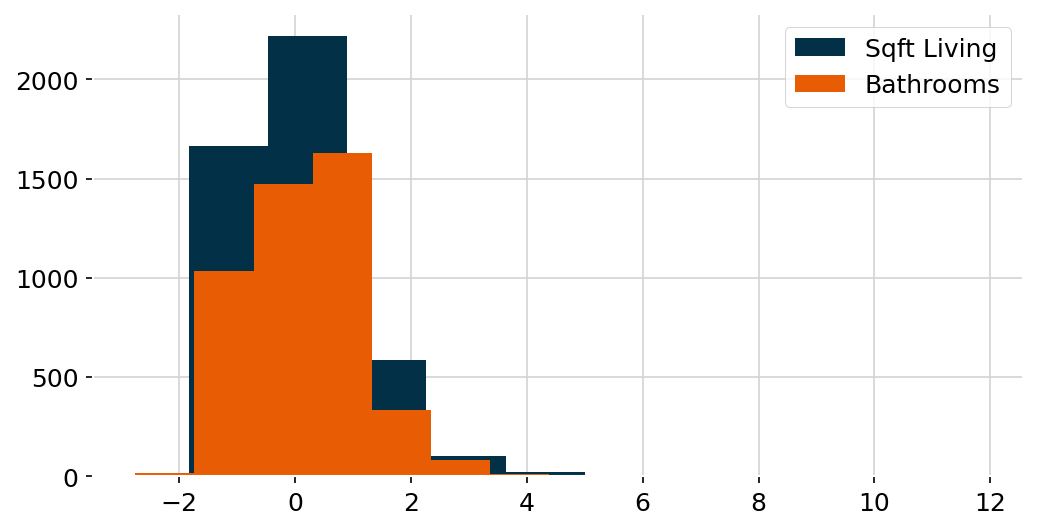

In [16]:
x_std = pd.DataFrame(x_std, columns=['sqft_living', 'bathrooms'])
x_std.sqft_living.hist()
x_std.bathrooms.hist()
plt.legend(['Sqft Living', 'Bathrooms'])
plt.show()

##### 2.4 - Padronização e Normalização dos dados e aplicação de algoritmos de Machine Learning 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [18]:
x = data[['sqft_living', 'bathrooms']].values
y = data['price'].values

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7)

In [20]:
len(xtrain), len(xtest)

NameError: name 'xtrain' is not defined

In [27]:
scaler = MinMaxScaler()

scaler.fit(x_train)

MinMaxScaler()

In [28]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
model = LinearRegression()

model.fit(x_train_scaled, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test_scaled)

In [32]:
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {MAE:.2f}')
print(f'R2: {r2:.2f}')

MAE: 173536.74
R2: 0.46


##### 2.5 - Aplicação de algoritmos de Machine Learning sem normalização dos dados

In [33]:
model_norescale = LinearRegression()

model_norescale.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred_norescale = model_norescale.predict(x_test)

In [35]:
MAE = mean_absolute_error(y_test, y_pred_norescale)
r2 = r2_score(y_test, y_pred_norescale)

print(f'MAE: {MAE:.2f}')
print(f'R2: {r2:.2f}')

MAE: 173536.74
R2: 0.46


##### **Observação:**  Neste caso, em particular, a normalização dos dados não foi necessária, pois o algoritmo de Regressão Linear não foi afetado pela escala dos dados. No entanto, é importante ressaltar que, em muitos casos, a normalização dos dados é necessária para que o algoritmo de Machine Learning funcione corretamente.

### Aula 4 - Avaliando o Melhor Modelo de Regressão

#### 4.1. Aquisição dos dados
- **Descrição:**  Os dados foram obtidos a partir do github do curso, e são referentes a um dataset sobre imóveis. 
- **Atributos:** 
    * ***Ordem:*** ID de cada imóvel
    * ***Valor:*** Valor do imóvel
    *  ***Area:*** Área do imóvel
    *  ***IA:*** Idade do imóvel
    *  ***Andar:*** Quantidade de andares do imóvel
    *  ***Suites:*** Quantidade de suítes do imóvel
    *  ***Vista:*** Se o imovel tem uma boa vista ou não
    *  ***DistBM:*** Distância do imóvel do Mar
    *  ***Semruido:*** Se o imóvel é locaziado em uma área sem ruído
    *  ***AV100m:*** Distancia do imóvel para área verde
    *  

##### 4.2 -  Importando a Base de dados 

In [25]:
df = pd.read_csv('../../data/raw/Valorizacao_Ambiental.csv', sep=';')

* **Verificando a necessidade de limpeza e tratamento dos dados.**

In [26]:
df.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Dtype
---  ------    -----
 0   Ordem     int64
 1   Valor     int64
 2   Area      int64
 3   IA        int64
 4   Andar     int64
 5   Suites    int64
 6   Vista     int64
 7   DistBM    int64
 8   Semruido  int64
 9   AV100m    int64
dtypes: int64(10)
memory usage: 13.6 KB


In [28]:
df.notnull().sum()

Ordem       172
Valor       172
Area        172
IA          172
Andar       172
Suites      172
Vista       172
DistBM      172
Semruido    172
AV100m      172
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(0)